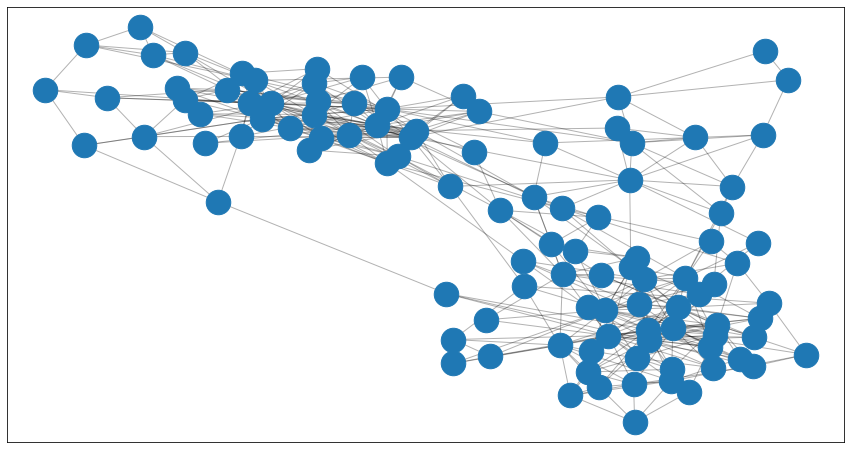

Best chromosome in generation  0  is:  [94, 92, 59, 8, 42, 89, 36, 100, 6, 20, 31, 71, 102, 94, 96, 95, 11, 100, 97, 82, 7, 27, 101, 87, 32, 23, 93, 33, 50, 33, 27, 74, 103, 37, 90, 0, 22, 79, 39, 74, 72, 18, 78, 3, 57, 73, 86, 99, 93, 84, 29, 2, 83, 16, 16, 66, 4, 47, 30, 33, 36, 22, 100, 40, 38, 80, 71, 99, 25, 47, 5, 33, 6, 91, 59, 78, 19, 6, 52, 52, 15, 76, 39, 34, 79, 32, 33, 36, 68, 9, 29, 22, 72, 102, 70, 71, 9, 88, 8, 51, 46, 68, 59, 49, 53] 
 fitness =  -0.023920074454573993
Best chromosome in generation  1  is:  [94, 92, 59, 8, 42, 89, 36, 100, 6, 20, 31, 71, 102, 94, 96, 95, 11, 100, 97, 82, 7, 27, 101, 87, 32, 23, 93, 33, 50, 33, 27, 74, 103, 37, 90, 0, 22, 79, 39, 74, 72, 18, 78, 3, 57, 73, 86, 99, 93, 84, 29, 2, 83, 16, 16, 66, 4, 47, 30, 33, 36, 22, 100, 40, 38, 80, 71, 99, 25, 47, 5, 33, 6, 91, 59, 78, 19, 6, 52, 52, 15, 76, 39, 34, 79, 32, 33, 36, 68, 9, 29, 22, 72, 102, 70, 71, 9, 88, 8, 51, 46, 68, 59, 49, 53] 
 fitness =  -0.023920074454573993
Best chromosome in gen

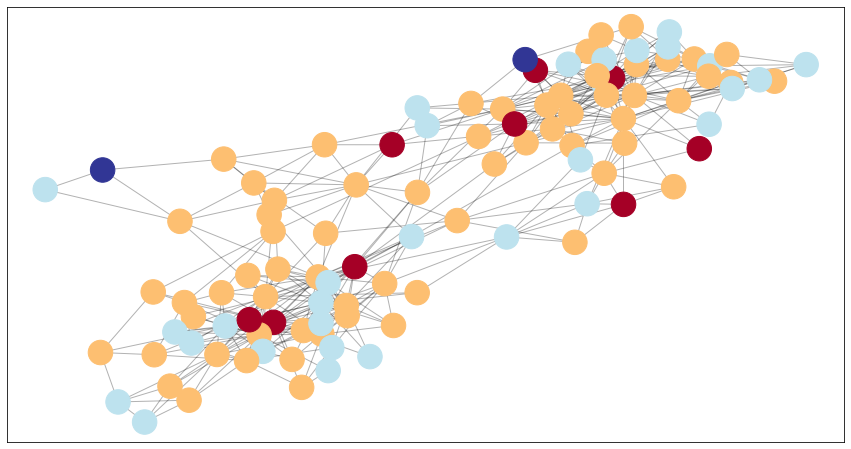

In [12]:
from main import *

data = read_data('real/polbooks/polbooks.gml')

warnings.simplefilter('ignore')
A = np.matrix(data['mat'])
G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 8))
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

ga_param = {'pop_size': 100, 'no_generations': 100}
funct = lambda x : modularity(x, data)
probl_param = {'min': 0, 'max': data['no_nodes'], 'function': funct, 'no_dim': data['no_nodes']}

ga = GA(ga_param, probl_param)
ga.initialisation()
ga.evaluation()

minim = 1000000
res = []

for g in range(ga_param['no_generations']):
    ga.one_generation_elitism()

    best_chromosome = ga.best_chromosome()

    print('Best chromosome in generation ', g, ' is: ', best_chromosome.repres,
          '\n fitness = ', best_chromosome.fitness)

    if best_chromosome.fitness < minim:
        minim = best_chromosome.fitness
        res = components(best_chromosome.repres)

print('Best chromosome: ')
print(res)
print('Number of comunities')
print(len(set(res)))

A = np.matrix(data['mat'])
G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 8))
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=res)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)
